In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

telco_base_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [3]:
telco_base_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_base_data.shape


(7043, 21)

In [5]:
telco_base_data.describe()



,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
telco_base_data.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]>

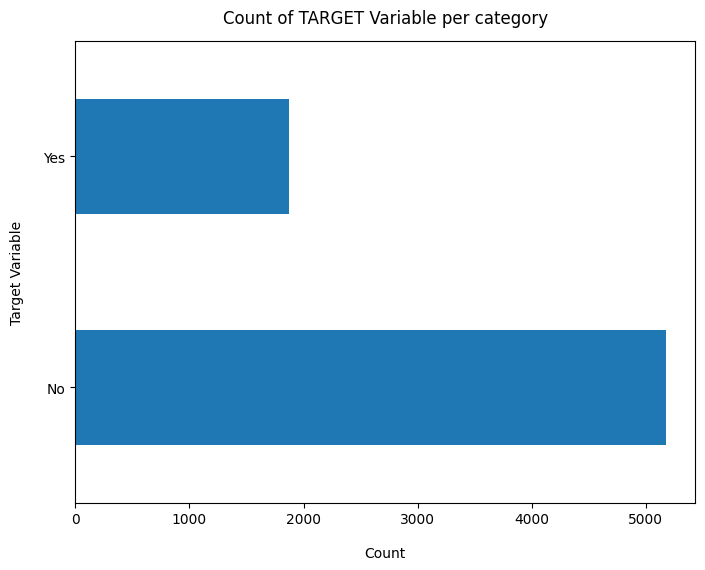

In [7]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);


In [8]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

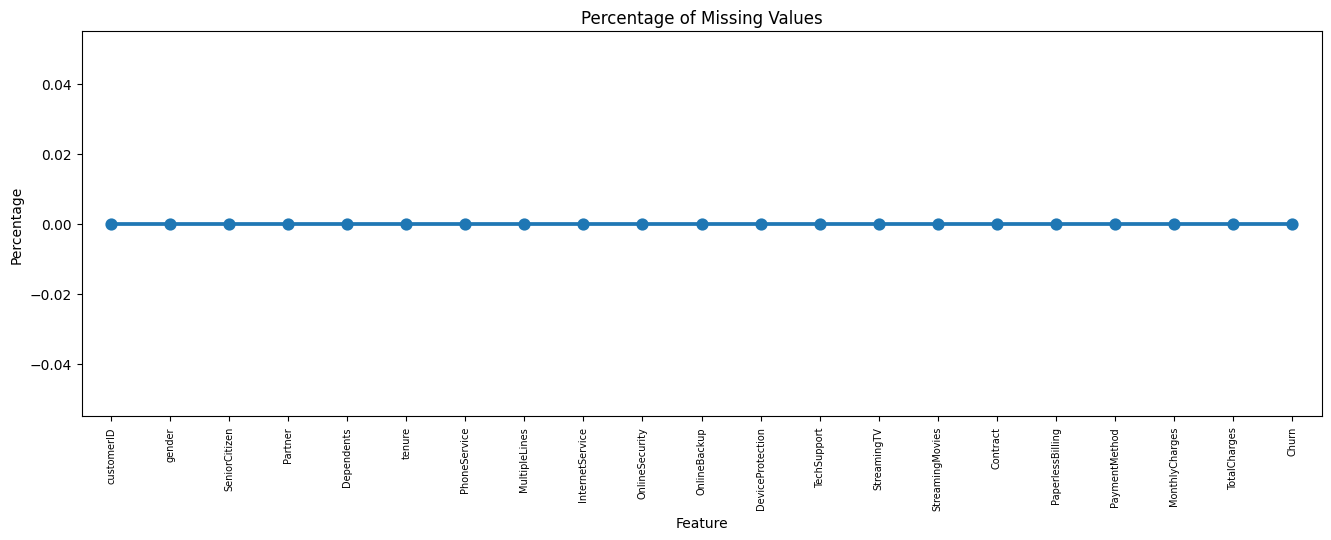

In [9]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
missing.columns = ['Feature', 'Percentage']

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='Feature', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

In [10]:
telco_data = telco_base_data.copy()

In [11]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
telco_data.dropna(how = 'any', inplace = True)

In [13]:
print(telco_data['tenure'].max())

72


In [14]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [15]:
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


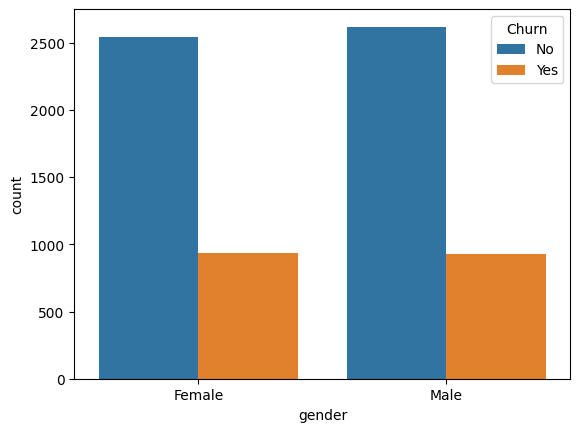

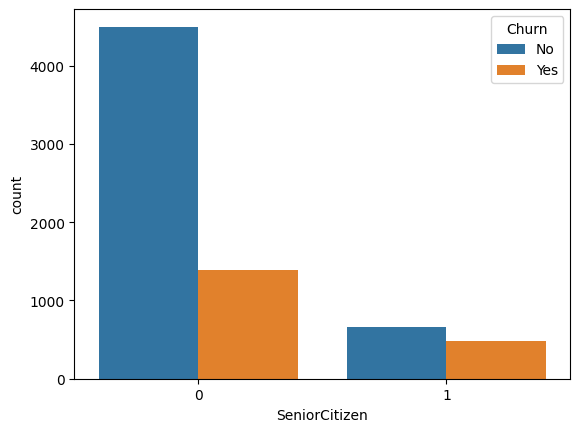

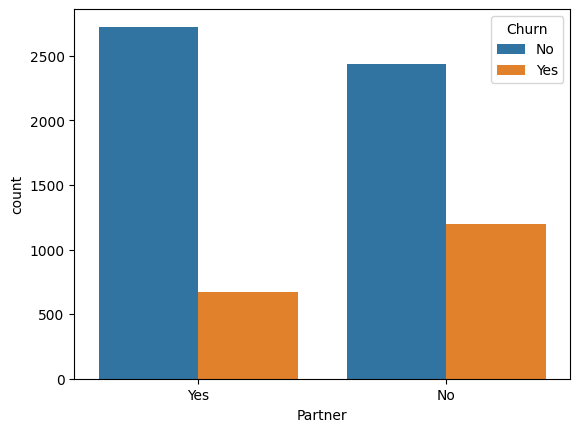

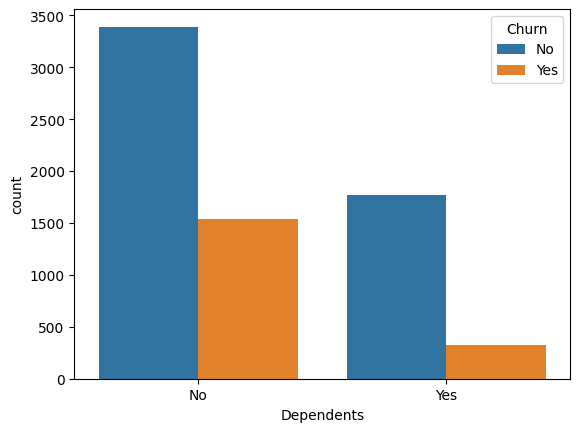

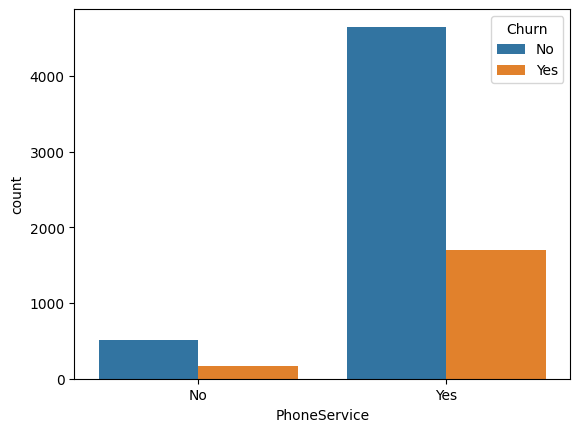

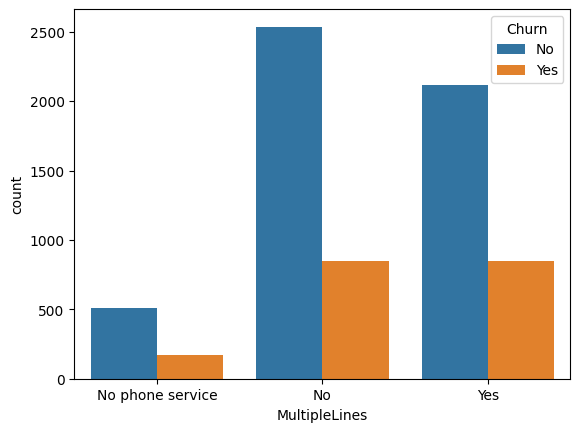

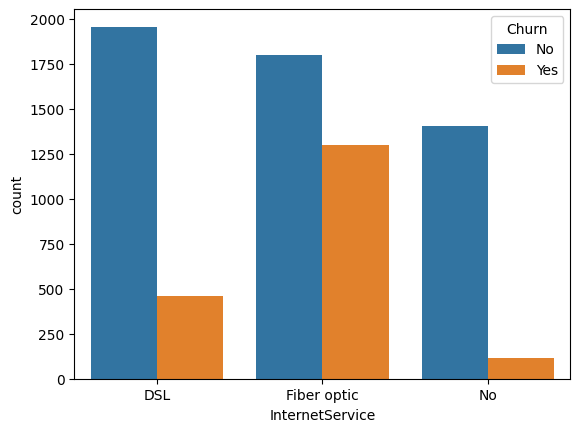

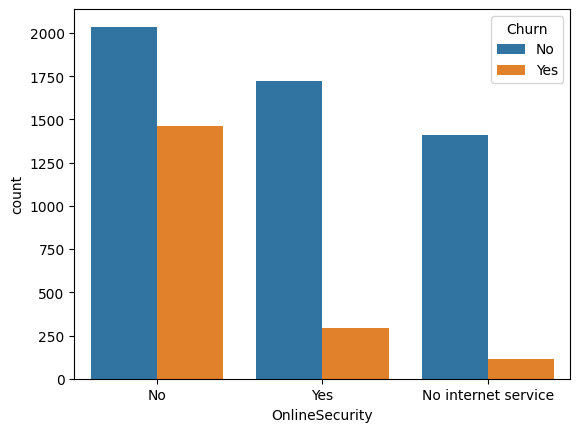

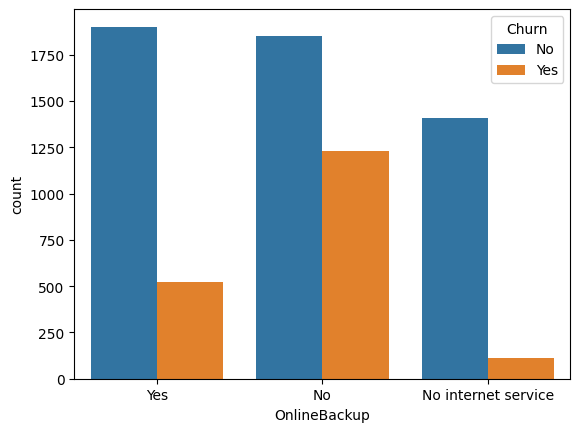

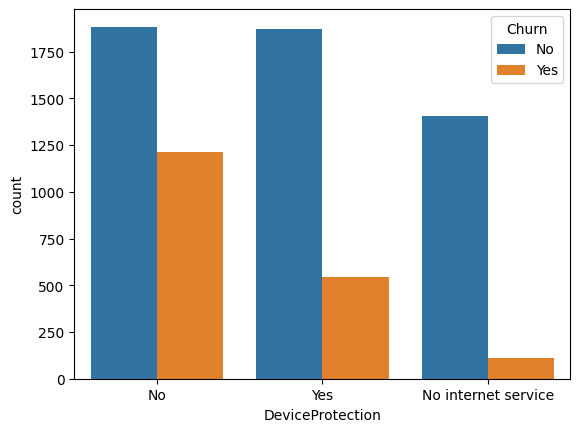

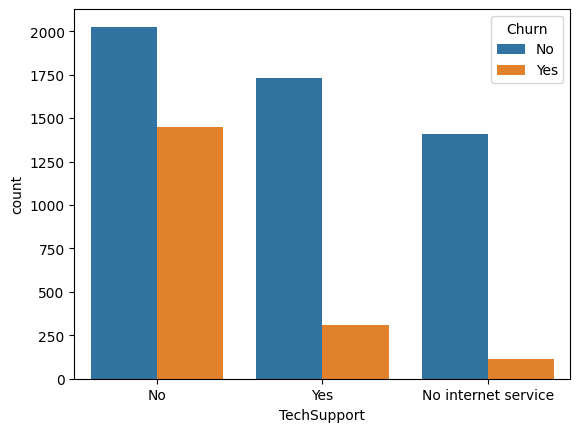

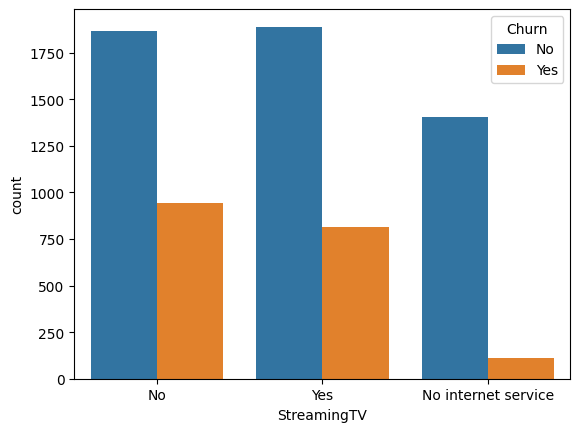

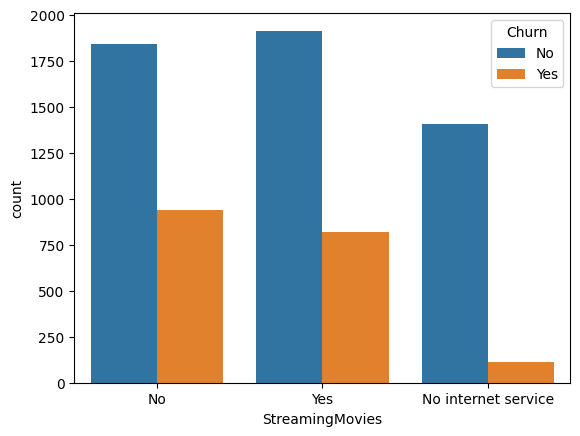

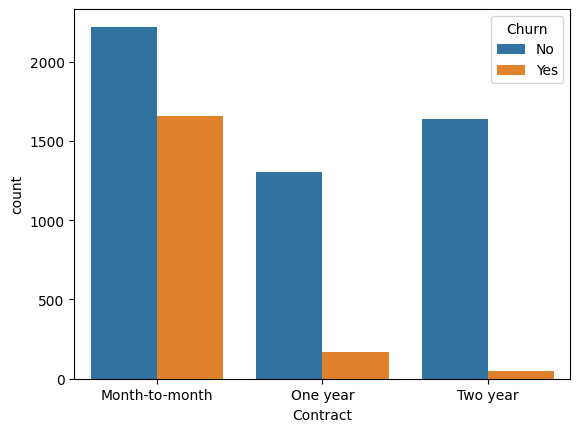

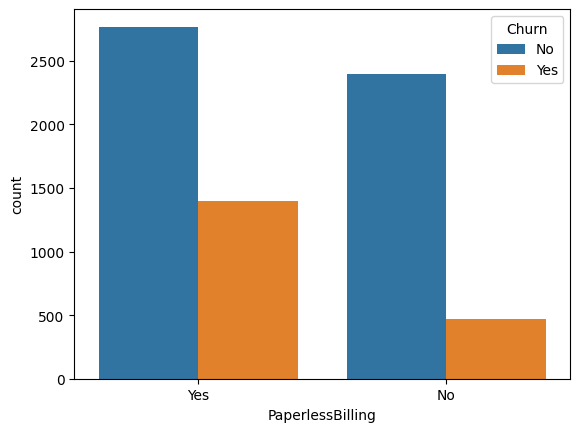

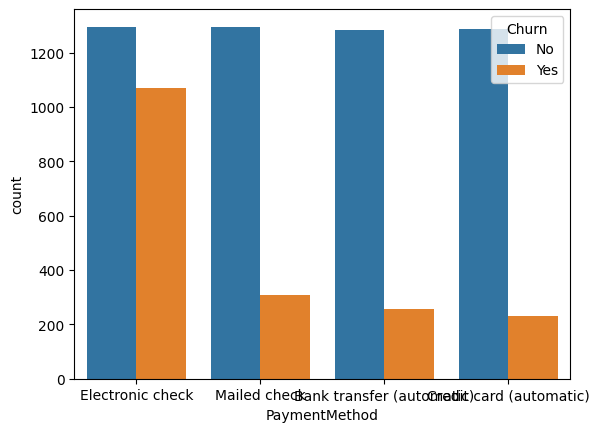

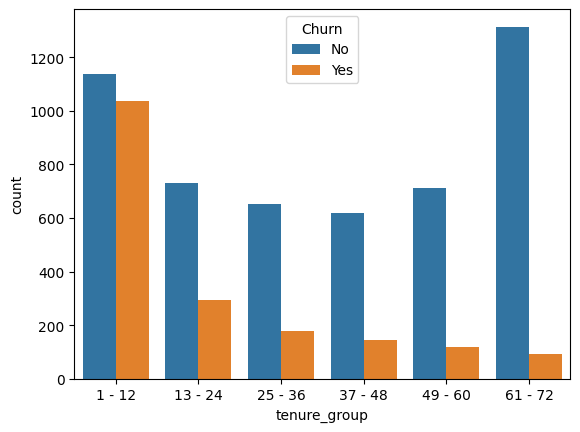

In [16]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

In [17]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [18]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


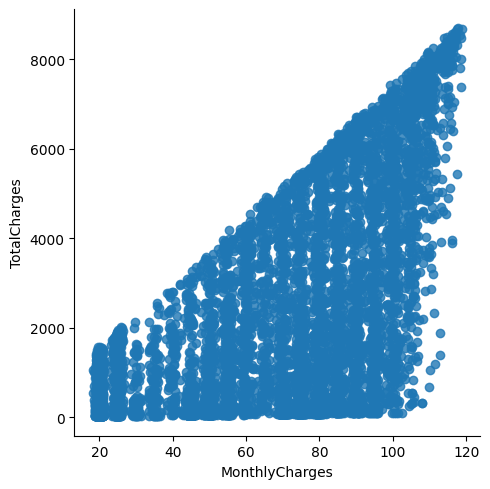

In [19]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

<ipython-input-20-940d64c03b8e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
<ipython-input-20-940d64c03b8e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

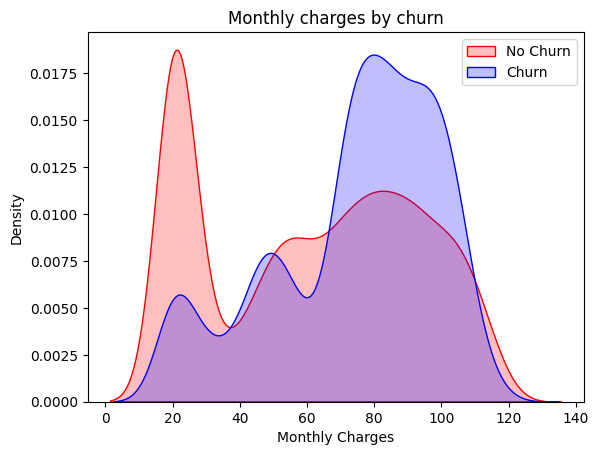

In [20]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

<ipython-input-21-aa9d55a4850a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
<ipython-input-21-aa9d55a4850a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

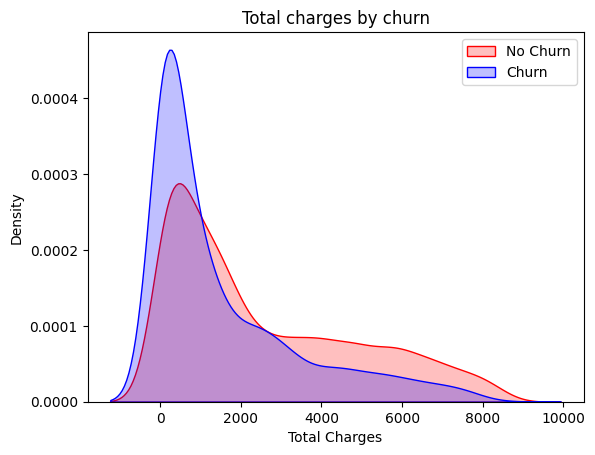

In [21]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')


<Axes: >

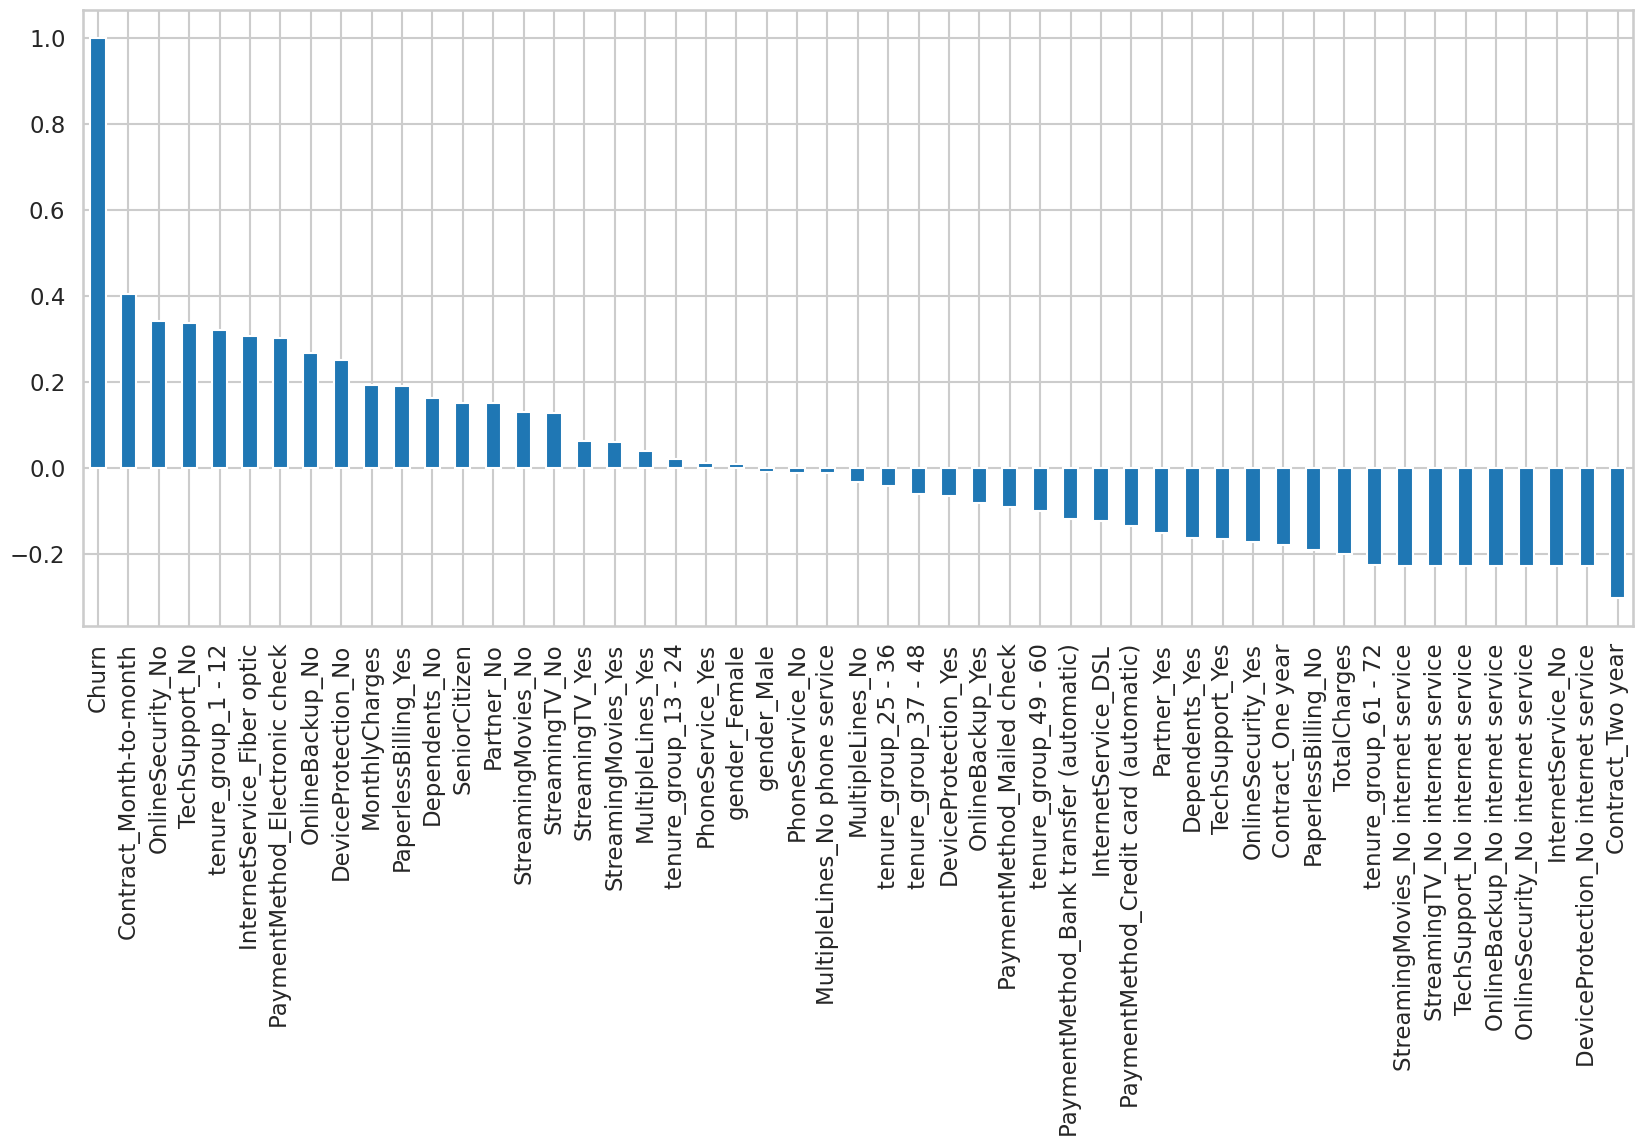

In [27]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

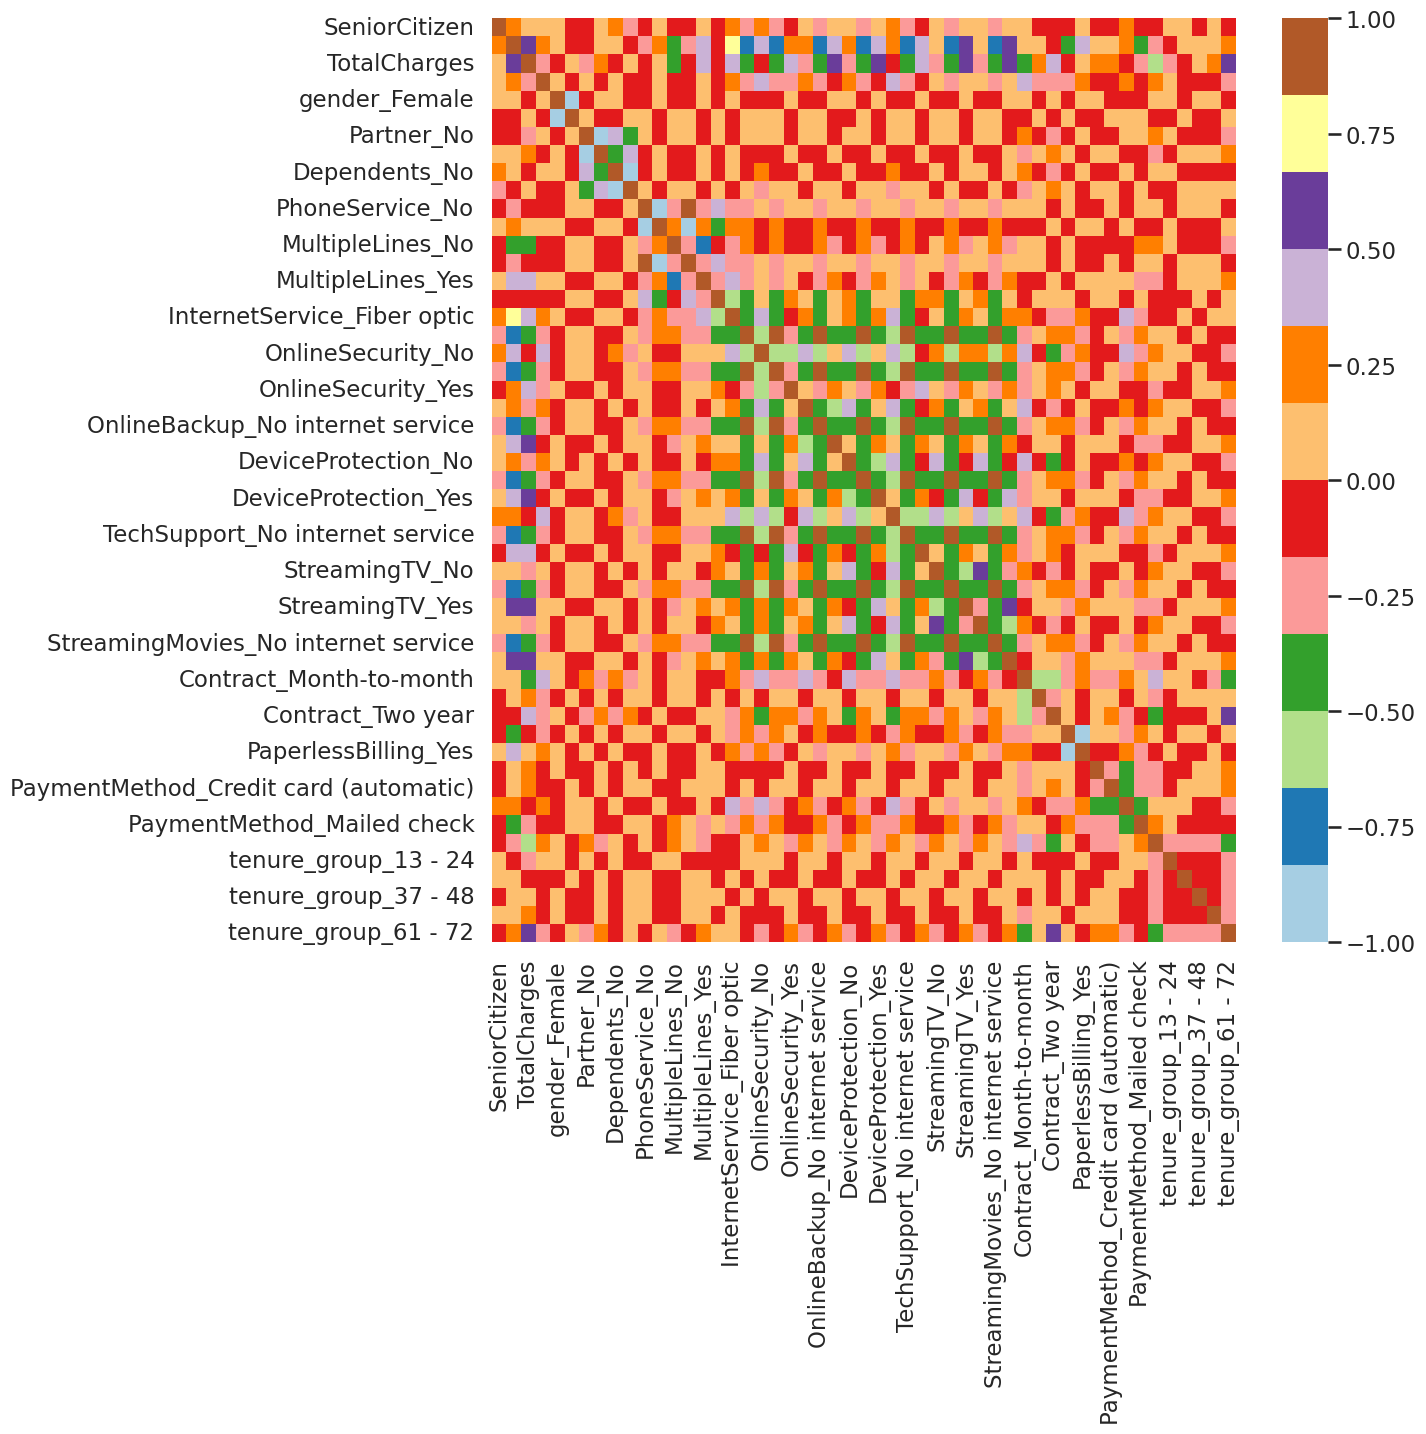

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

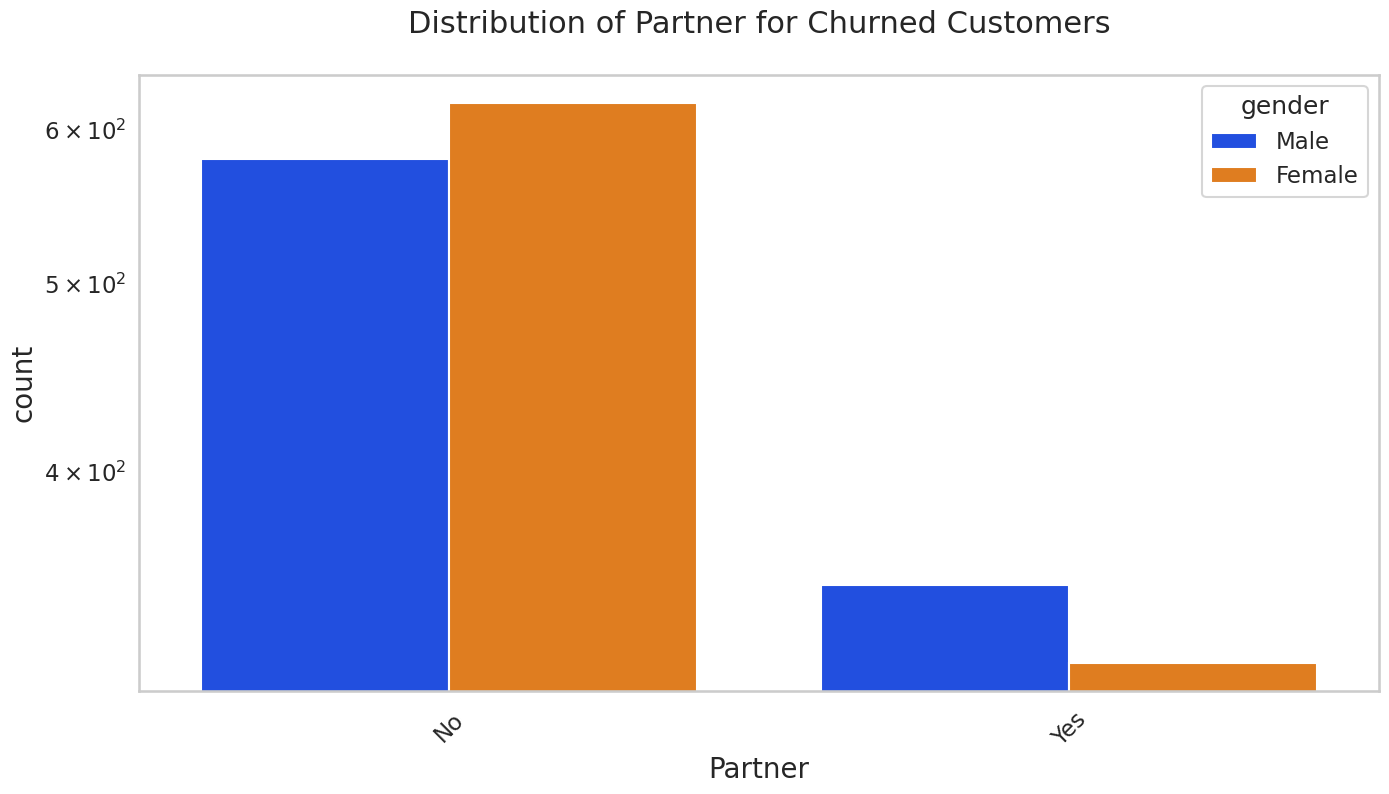

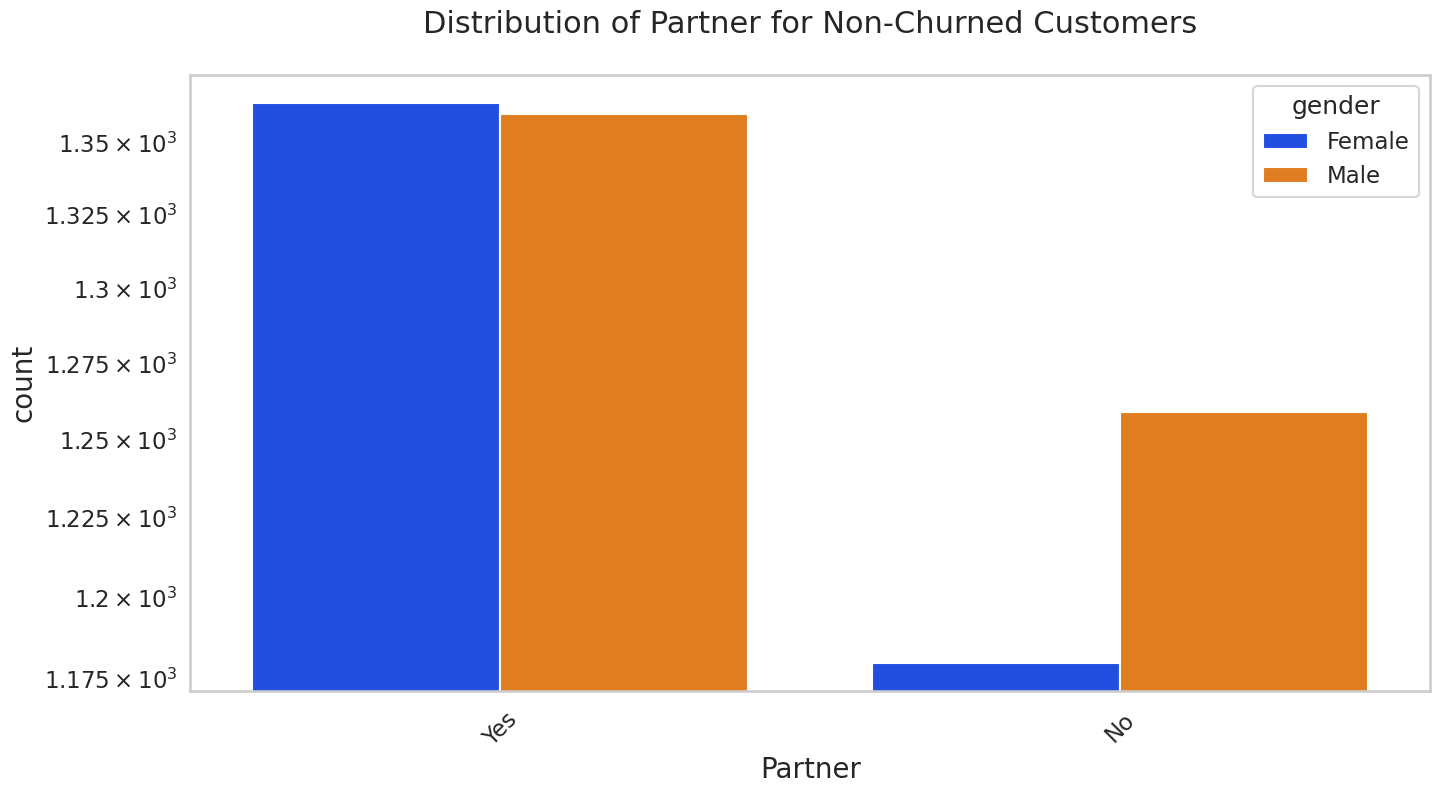

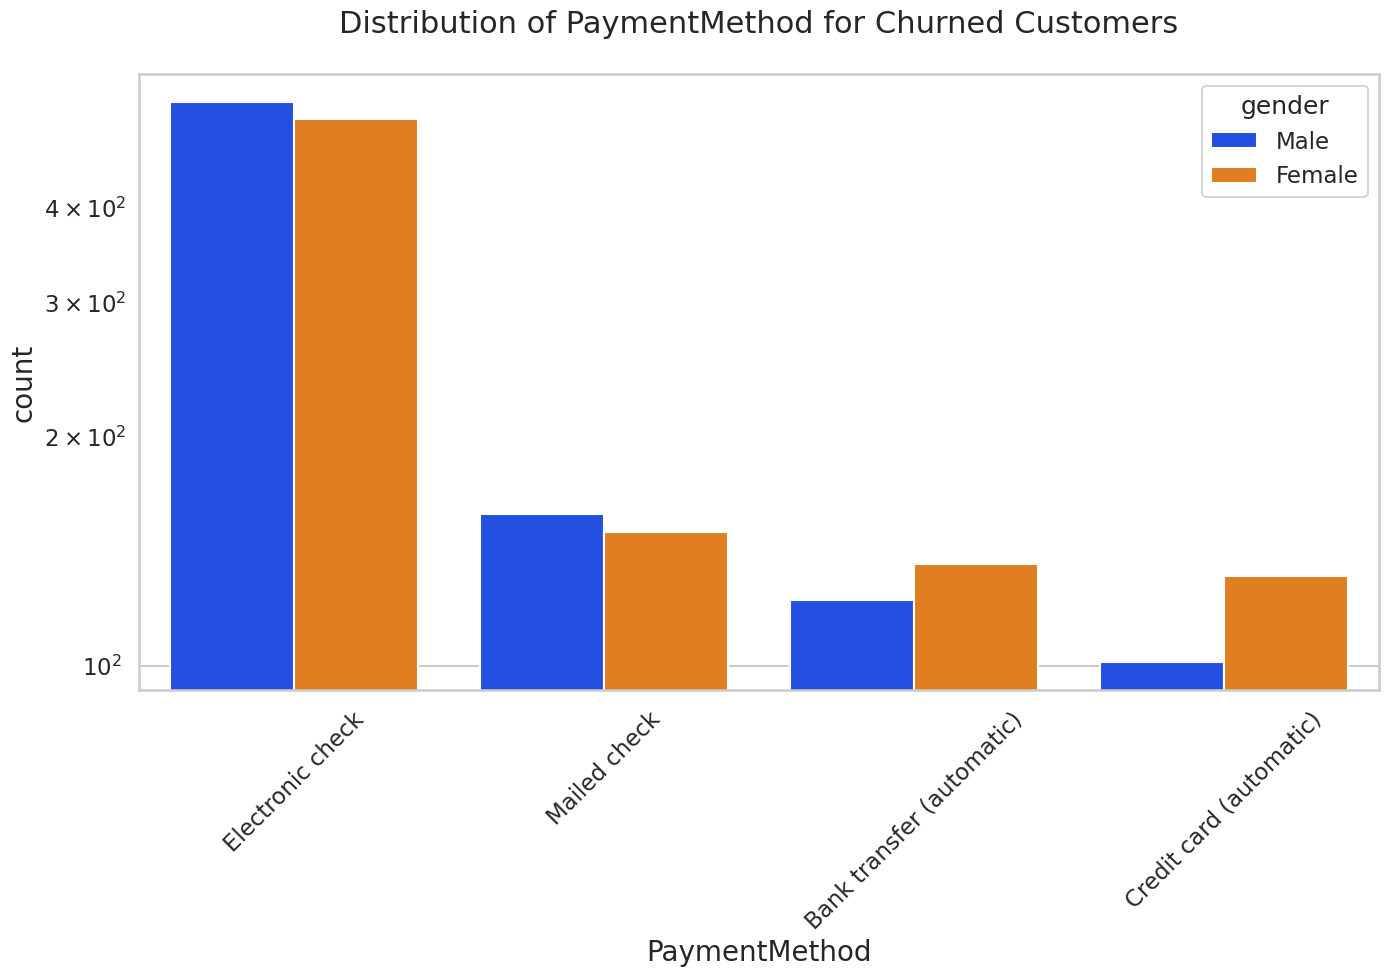

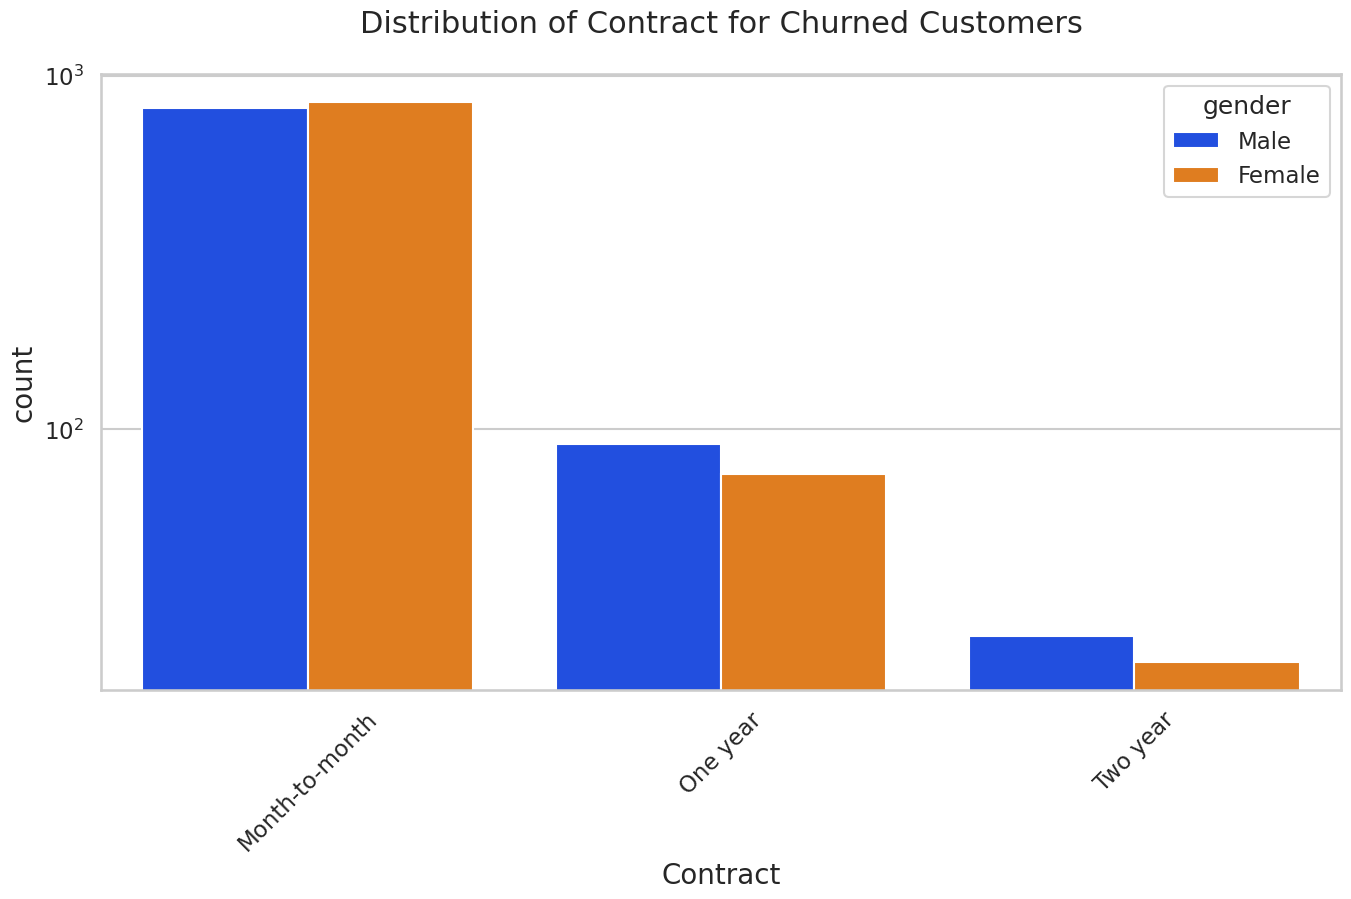

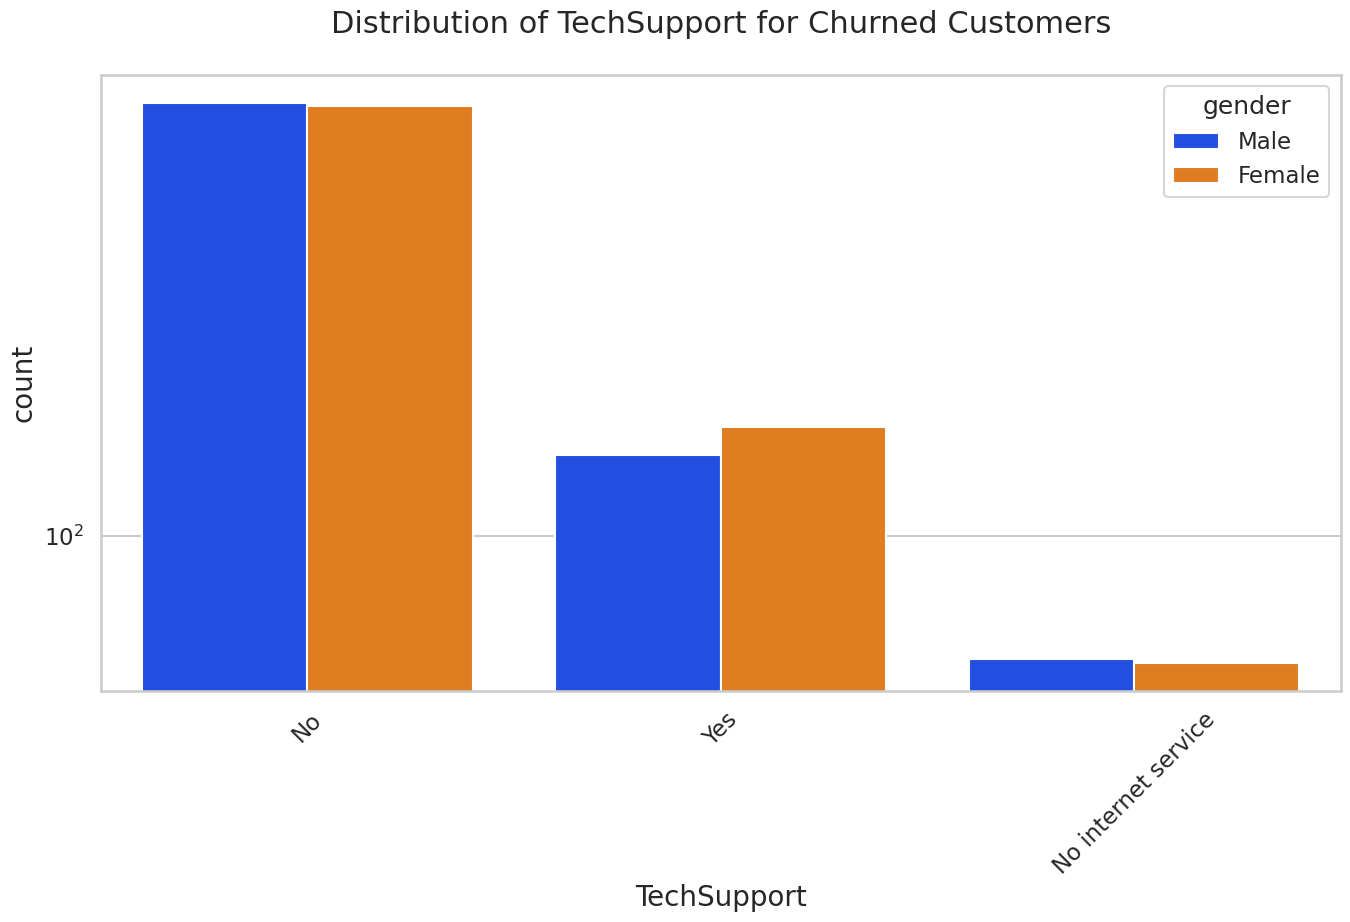

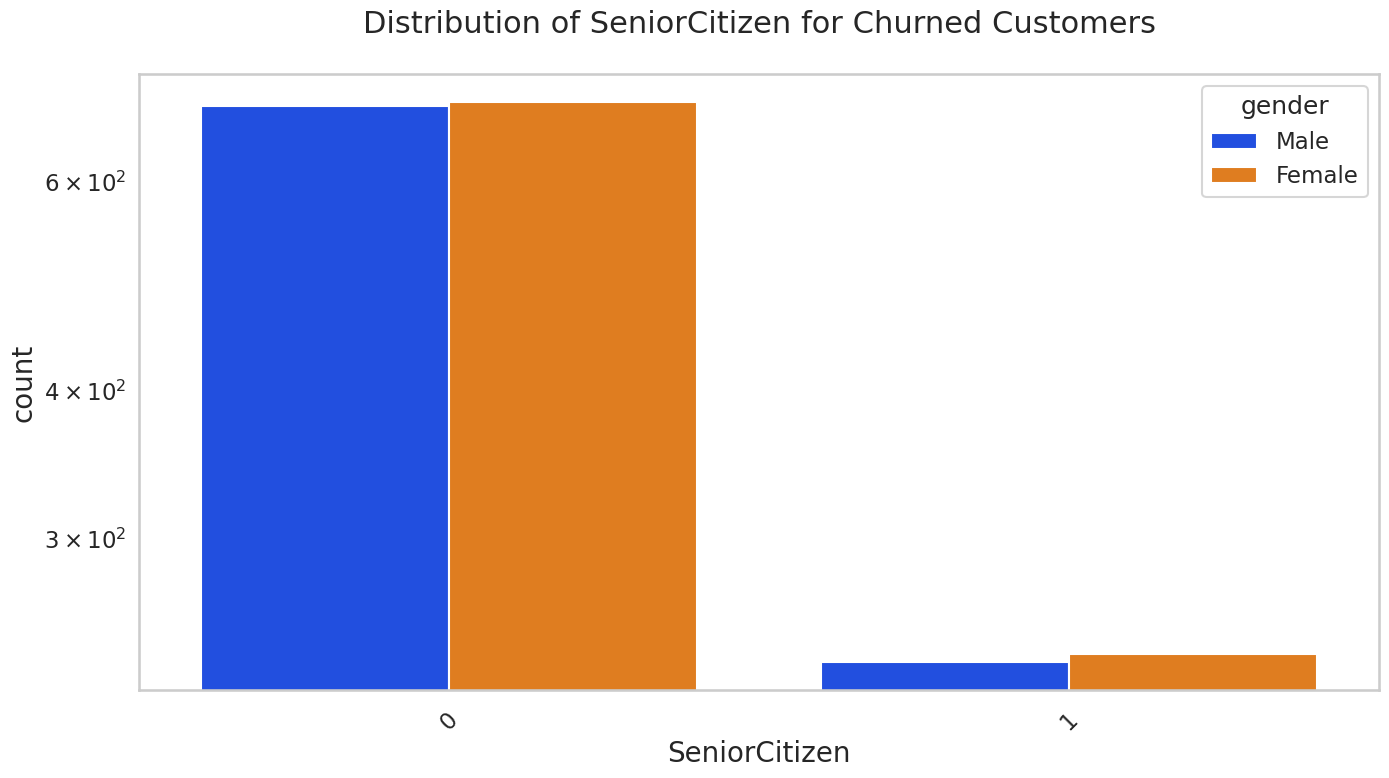

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the data based on churn
new_df1_target0 = telco_data[telco_data["Churn"] == 0]
new_df1_target1 = telco_data[telco_data["Churn"] == 1]

# Set the style and context for the plots
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

# Plot 1: Distribution of Partner for Churned Customers
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=new_df1_target1, x='Partner', order=new_df1_target1['Partner'].value_counts().index, hue='gender', palette='bright')
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Distribution of Partner for Churned Customers')
plt.show()

# Plot 2: Distribution of Partner for Non-Churned Customers
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=new_df1_target0, x='Partner', order=new_df1_target0['Partner'].value_counts().index, hue='gender', palette='bright')
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Distribution of Partner for Non-Churned Customers')
plt.show()

# Plot 3: Distribution of PaymentMethod for Churned Customers
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=new_df1_target1, x='PaymentMethod', order=new_df1_target1['PaymentMethod'].value_counts().index, hue='gender', palette='bright')
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Distribution of PaymentMethod for Churned Customers')
plt.show()

# Plot 4: Distribution of Contract for Churned Customers
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=new_df1_target1, x='Contract', order=new_df1_target1['Contract'].value_counts().index, hue='gender', palette='bright')
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Distribution of Contract for Churned Customers')
plt.show()

# Plot 5: Distribution of TechSupport for Churned Customers
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=new_df1_target1, x='TechSupport', order=new_df1_target1['TechSupport'].value_counts().index, hue='gender', palette='bright')
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Distribution of TechSupport for Churned Customers')
plt.show()

# Plot 6: Distribution of SeniorCitizen for Churned Customers
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=new_df1_target1, x='SeniorCitizen', order=new_df1_target1['SeniorCitizen'].value_counts().index, hue='gender', palette='bright')
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Distribution of SeniorCitizen for Churned Customers')
plt.show()


In [33]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [34]:
telco_data_dummies.to_csv('tel_churn.csv')

In [35]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [36]:
df=df.drop('Unnamed: 0',axis=1)
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [37]:
y=df['Churn']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [39]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
model_dt.score(x_test,y_test)

0.7924662402274343

In [41]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1043
           1       0.62      0.52      0.57       364

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



In [43]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9313304721030042
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       526
           1       0.95      0.92      0.94       639

    accuracy                           0.93      1165
   macro avg       0.93      0.93      0.93      1165
weighted avg       0.93      0.93      0.93      1165



In [44]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[498  28]
 [ 52 587]]


In [45]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)

y_pred=model_rf.predict(x_test)
model_rf.score(x_test,y_test)

0.8052594171997157

In [46]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1043
           1       0.67      0.48      0.56       364

    accuracy                           0.81      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.81      0.79      1407



In [48]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(xr_train1,yr_train1)
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9297945205479452
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       527
           1       0.92      0.96      0.94       641

    accuracy                           0.93      1168
   macro avg       0.93      0.93      0.93      1168
weighted avg       0.93      0.93      0.93      1168



In [49]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[471  56]
 [ 26 615]]


In [50]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model.fit(xr_train_pca,yr_train1)
yr_predict_pca = model.predict(xr_test_pca)
model_score_r_pca = model.score(xr_test_pca, yr_test1)
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7337328767123288
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       527
           1       0.73      0.81      0.77       641

    accuracy                           0.73      1168
   macro avg       0.73      0.73      0.73      1168
weighted avg       0.73      0.73      0.73      1168



In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

model_gb = GradientBoostingClassifier(n_estimators=100, random_state=100, max_depth=6)
model_gb.fit(x_train, y_train)

y_pred_gb = model_gb.predict(x_test)
score_gb = model_gb.score(x_test, y_test)

print(f"Gradient Boosting Model Score: {score_gb}")
print(metrics.classification_report(y_test, y_pred_gb, labels=[0, 1]))
print(metrics.confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Model Score: 0.7938877043354655
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1043
           1       0.62      0.53      0.57       364

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407

[[925 118]
 [172 192]]


In [58]:

sm = SMOTEENN()
X_resampled_gb, y_resampled_gb = sm.fit_resample(x, y)

xr_train_gb, xr_test_gb, yr_train_gb, yr_test_gb = train_test_split(X_resampled_gb, y_resampled_gb, test_size=0.2, random_state=100)

model_gb_smote = GradientBoostingClassifier(n_estimators=100, random_state=100, max_depth=6)
model_gb_smote.fit(xr_train_gb, yr_train_gb)

yr_predict_gb = model_gb_smote.predict(xr_test_gb)
model_score_gb = model_gb_smote.score(xr_test_gb, yr_test_gb)

print(f"Gradient Boosting with SMOTEENN Model Score: {model_score_gb}")
print(metrics.classification_report(yr_test_gb, yr_predict_gb, labels=[0, 1]))
print(metrics.confusion_matrix(yr_test_gb, yr_predict_gb))


Gradient Boosting with SMOTEENN Model Score: 0.9703891708967851
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       561
           1       0.97      0.97      0.97       621

    accuracy                           0.97      1182
   macro avg       0.97      0.97      0.97      1182
weighted avg       0.97      0.97      0.97      1182

[[542  19]
 [ 16 605]]


In [56]:
import pickle


filename_gb = 'gradient_boost_model.sav'


pickle.dump(model_gb_smote, open(filename_gb, 'wb'))


In [59]:

load_model_gb = pickle.load(open(filename_gb, 'rb'))


model_score_gb_loaded = load_model_gb.score(xr_test_gb, yr_test_gb)

print(f"Loaded Gradient Boosting Model Score: {model_score_gb_loaded}")

yr_predict_gb_loaded = load_model_gb.predict(xr_test_gb)
print(metrics.classification_report(yr_test_gb, yr_predict_gb_loaded, labels=[0, 1]))
print(metrics.confusion_matrix(yr_test_gb, yr_predict_gb_loaded))


Loaded Gradient Boosting Model Score: 0.9873096446700508
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       561
           1       0.99      0.98      0.99       621

    accuracy                           0.99      1182
   macro avg       0.99      0.99      0.99      1182
weighted avg       0.99      0.99      0.99      1182

[[556   5]
 [ 10 611]]
